In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
file_name = 'StudentsPerformance'
df = pd.read_csv('./data/'+file_name+'.csv')

y_target = df['writing score']
df.drop(['writing score'], axis=1, inplace = True)
X_data = pd.get_dummies(df)

## 설정한 alpha값마다 각각 그래프 생성
- Ridge
- Lasso
- ElasticNet

최적 alpha값 그래프만(graph_create) 그리는게 더 깔끔한거같아서 이건 잘 안쓸듯.

######  Ridge ######


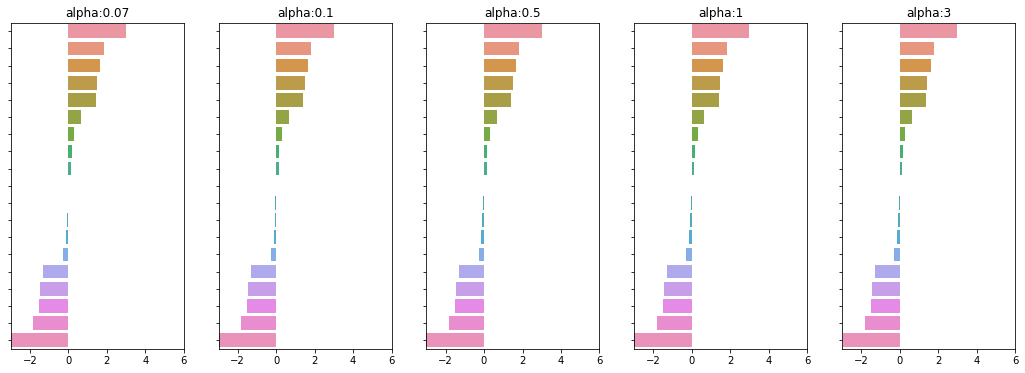

######  Lasso ######


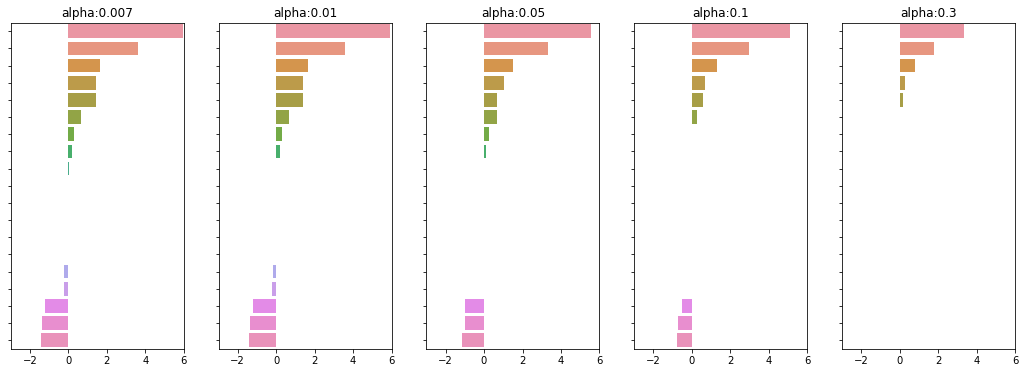

######  ElasticNet ######


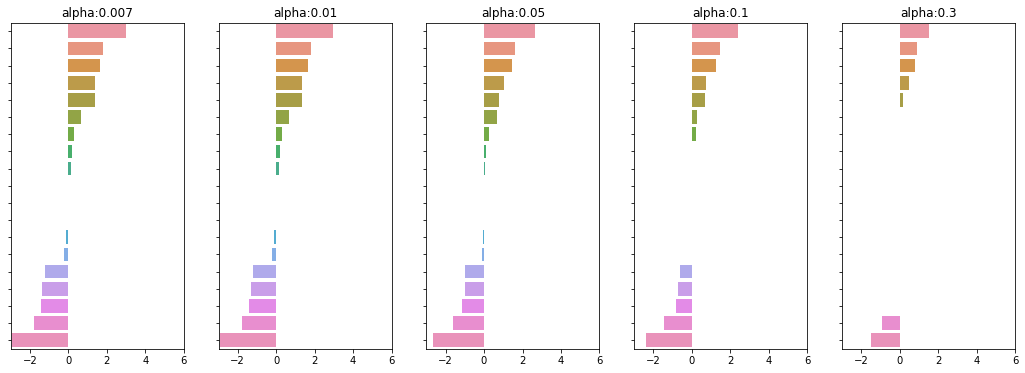

In [17]:
def graphs_create(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
    coeff_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######')
    for pos, alpha in enumerate(params):
        if model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        elif model_name == 'Lasso':
            model = Lasso(alpha=alpha)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(alpha)
        coeff_df[colname] = coeff
        coeff = coeff.sort_values(ascending=False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3,6)
        sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
        ax = sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
        ax.set(yticklabels=[])

    plt.show()
    
ridge_alphas = [0.07, 0.1, 0.5, 1, 3,]
alphas = [0.007, 0.01, 0.05, 0.1, 0.3,]
graphs_create('Ridge', params=ridge_alphas, X_data_n=X_data, y_target_n=y_target)
graphs_create('Lasso', params=alphas, X_data_n=X_data, y_target_n=y_target)
graphs_create('ElasticNet', params=alphas, X_data_n=X_data, y_target_n=y_target)

## Ridge, Lasso, ElasticNet 별 
- Negative MSE scores
- RMSE scores
- RMSE

측정함수.

In [59]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######\n')
    for i, param in enumerate(params):
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)    
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        
        if i == 0:
            print("--- 최악의 alpha ---")
        elif i == len(params)-1:
            print("--- 최적의 alpha ---")
            
        print('\talpha {0} 일 때 5 폴드 세트의 개별 Negative MSE scores: {1}'.format(param, np.round(neg_mse_scores, 3)))
        print('\talpha {0} 일 때 5 폴드 세트의 개별 RMSE scores: {1}'.format(param, np.round(rmse_scores, 3)))
        print('\talpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}\n'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
            return coeff_df

## 설정한 alpha값에 대한 그래프 생성
- Ridge
- Lasso
- ElasticNet

최적 alpha값 파라미터로 받아와 하나의 그래프만(graph_create) 그린다.


In [60]:
def graph_create(model_name, param=None, X_data_n=None, y_target_n=None, verbose=True):
    if model_name == 0:
        model = Ridge(alpha=param)
    elif model_name == 1:
        model = Lasso(alpha=param)
    elif model_name == 2:
        model = ElasticNet(alpha=param, l1_ratio=0.7)
    
    model.fit(X_data, y_target)
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    coeff = coeff.sort_values(ascending=False)
    ax = sns.barplot(x=coeff.values, y=coeff.index)
    ax.set(yticklabels=[])
    plt.show()

### 위에서 선언한 함수들 사용하는 부분

######  Ridge ######


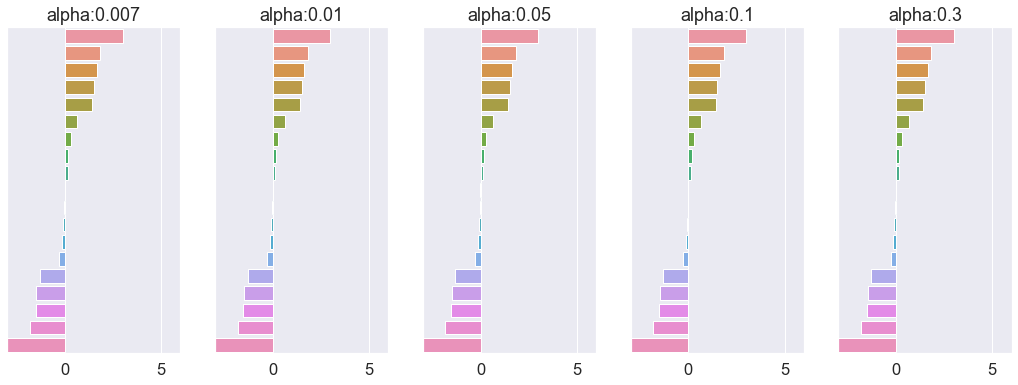

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.07 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.364 -12.731 -11.623 -10.896 -13.664]
	alpha 0.07 일 때 5 폴드 세트의 개별 RMSE scores: [3.656 3.568 3.409 3.301 3.696]
	alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 3.526

--- 최적의 alpha ---
	alpha 3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.286 -12.78  -11.608 -10.897 -13.674]
	alpha 3 일 때 5 폴드 세트의 개별 RMSE scores: [3.645 3.575 3.407 3.301 3.698]
	alpha 3 일 때 5 폴드 세트의 평균 RMSE : 3.525

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 3}
	GridSearchCV 최고 정확도: 0.9468


            params  mean_test_score  rank_test_score
0  {'alpha': 0.07}         0.946828                5
1   {'alpha': 0.1}         0.946828                4
2   {'alpha': 0.5}         0.946832                3
3     {'alpha': 1}         0.946836                2
4     {'alpha': 3}         0.946838                1 

------------------------------------------------------------------------------------------------------------------
######  Lasso #

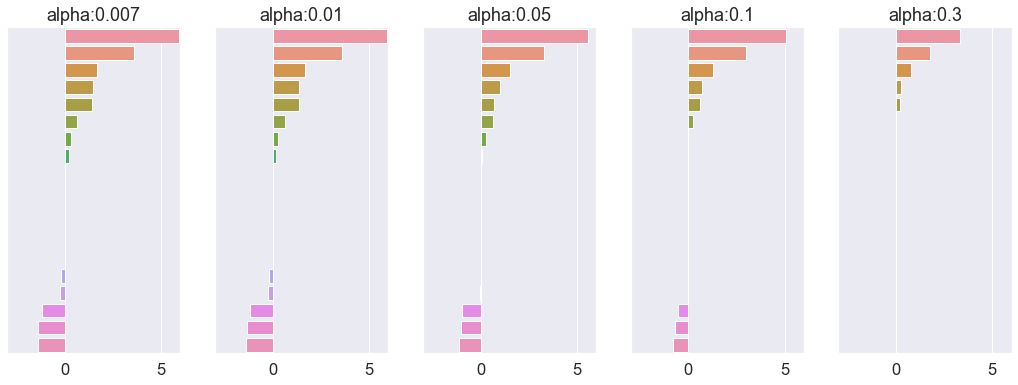

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.927 -17.133 -14.688 -13.343 -16.746]
	alpha 0.3 일 때 5 폴드 세트의 개별 RMSE scores: [3.732 4.139 3.832 3.653 4.092]
	alpha 0.3 일 때 5 폴드 세트의 평균 RMSE : 3.890

--- 최적의 alpha ---
	alpha 0.007 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.286 -12.797 -11.591 -10.868 -13.633]
	alpha 0.007 일 때 5 폴드 세트의 개별 RMSE scores: [3.645 3.577 3.405 3.297 3.692]
	alpha 0.007 일 때 5 폴드 세트의 평균 RMSE : 3.523

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 0.007}
	GridSearchCV 최고 정확도: 0.9468


             params  mean_test_score  rank_test_score
0  {'alpha': 0.007}         0.946844                1
1   {'alpha': 0.01}         0.946836                2
2   {'alpha': 0.05}         0.946127                3
3    {'alpha': 0.1}         0.943940                4
4    {'alpha': 0.3}         0.934194                5 

---------------------------------------------------------------------------------------------------------------

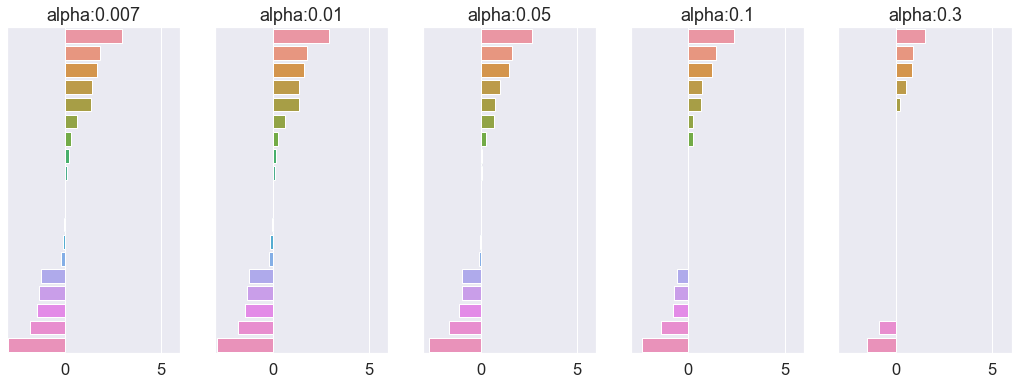

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-14.032 -17.167 -14.696 -13.477 -16.623]
	alpha 0.3 일 때 5 폴드 세트의 개별 RMSE scores: [3.746 4.143 3.834 3.671 4.077]
	alpha 0.3 일 때 5 폴드 세트의 평균 RMSE : 3.894

--- 최적의 alpha ---
	alpha 0.007 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.266 -12.805 -11.594 -10.876 -13.651]
	alpha 0.007 일 때 5 폴드 세트의 개별 RMSE scores: [3.642 3.578 3.405 3.298 3.695]
	alpha 0.007 일 때 5 폴드 세트의 평균 RMSE : 3.524

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 0.007}
	GridSearchCV 최고 정확도: 0.9468


             params  mean_test_score  rank_test_score
0  {'alpha': 0.007}         0.946849                1
1   {'alpha': 0.01}         0.946840                2
2   {'alpha': 0.05}         0.946010                3
3    {'alpha': 0.1}         0.943977                4
4    {'alpha': 0.3}         0.934463                5 

---------------------------------------------------------------------------------------------------------------

In [63]:
ridge_alphas = [0.07, 0.1, 0.5, 1, 3,]
alphas = [0.007, 0.01, 0.05, 0.1, 0.3,]

x_train, x_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state = 121)

for i in range(0,3):
    if i == 0:
        model_name = 'Ridge'
        use_alphas = ridge_alphas
        model = Ridge()
        graphs_create('Ridge', params=alphas, X_data_n=X_data, y_target_n=y_target)
    elif i == 1:
        model_name = 'Lasso'
        use_alphas = alphas
        model = Lasso()
        graphs_create('Lasso', params=alphas, X_data_n=X_data, y_target_n=y_target)
    elif i == 2:
        model_name = 'ElasticNet'
        use_alphas = alphas
        model = ElasticNet(l1_ratio=0.7)
        graphs_create('ElasticNet', params=alphas, X_data_n=X_data, y_target_n=y_target)
    
    grid_dclf = GridSearchCV(model, param_grid={'alpha':use_alphas}, cv=5, refit=True)
    grid_dclf.fit(x_train, y_train)
    print(">> cross_val_score <<")
    scores_df = pd.DataFrame(grid_dclf.cv_results_)
    worst_param = scores_df[scores_df['rank_test_score']==scores_df.shape[0]]['params'].iloc[0]['alpha']
    get_linear_reg_eval(model_name, params=[worst_param, grid_dclf.best_params_['alpha']], X_data_n=X_data, y_target_n=y_target, verbose=False, return_coeff=False)
    print(">> GridSearchCV <<")
    print("\tGridSearchCV 최적 하이퍼 파라미터",grid_dclf.best_params_)
    print("\tGridSearchCV 최고 정확도: {0:.4f}\n\n".format(grid_dclf.best_score_))
    
    scores_df = pd.DataFrame(grid_dclf.cv_results_)
    worst_param = scores_df[scores_df['rank_test_score']==scores_df.shape[0]]['params'].iloc[0]['alpha']
    print(scores_df[['params', 'mean_test_score', 'rank_test_score']],'\n')
    
    print("------------------------------------------------------------------------------------------------------------------")
#     graph_create(i, grid_dclf.best_params_['alpha'], X_data, y_target)

    



## 위 코드블럭 하나로 통합

######  Ridge ######


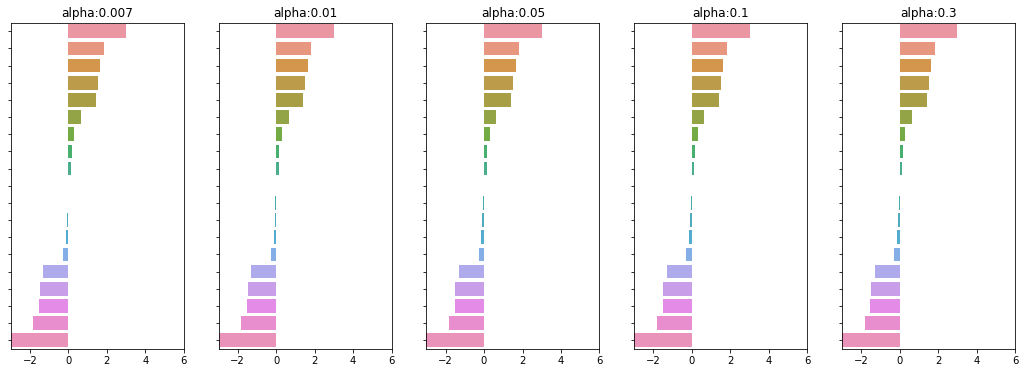

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.07 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.364 -12.731 -11.623 -10.896 -13.664]
	alpha 0.07 일 때 5 폴드 세트의 개별 RMSE scores: [3.656 3.568 3.409 3.301 3.696]
	alpha 0.07 일 때 5 폴드 세트의 평균 RMSE : 3.526

--- 최적의 alpha ---
	alpha 3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.286 -12.78  -11.608 -10.897 -13.674]
	alpha 3 일 때 5 폴드 세트의 개별 RMSE scores: [3.645 3.575 3.407 3.301 3.698]
	alpha 3 일 때 5 폴드 세트의 평균 RMSE : 3.525

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 3}
	GridSearchCV 최고 정확도: 0.9468


            params  mean_test_score  rank_test_score
0  {'alpha': 0.07}         0.946828                5
1   {'alpha': 0.1}         0.946828                4
2   {'alpha': 0.5}         0.946832                3
3     {'alpha': 1}         0.946836                2
4     {'alpha': 3}         0.946838                1 

------------------------------------------------------------------------------------------------------------------
######  Lasso #

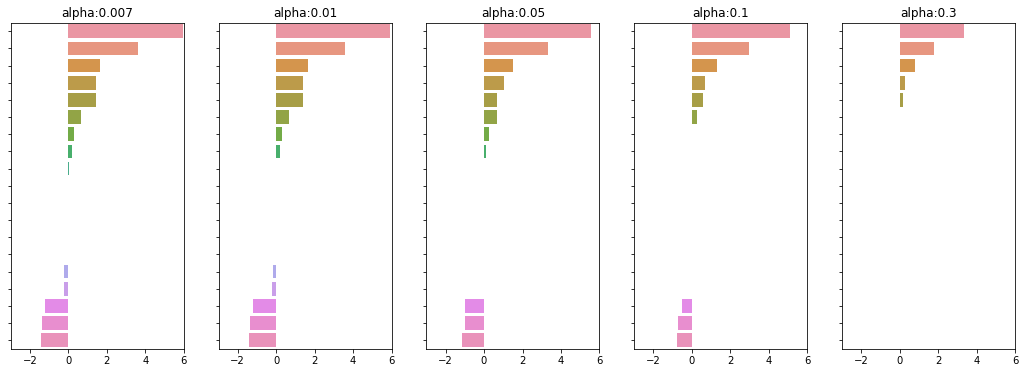

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.927 -17.133 -14.688 -13.343 -16.746]
	alpha 0.3 일 때 5 폴드 세트의 개별 RMSE scores: [3.732 4.139 3.832 3.653 4.092]
	alpha 0.3 일 때 5 폴드 세트의 평균 RMSE : 3.890

--- 최적의 alpha ---
	alpha 0.007 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.286 -12.797 -11.591 -10.868 -13.633]
	alpha 0.007 일 때 5 폴드 세트의 개별 RMSE scores: [3.645 3.577 3.405 3.297 3.692]
	alpha 0.007 일 때 5 폴드 세트의 평균 RMSE : 3.523

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 0.007}
	GridSearchCV 최고 정확도: 0.9468


             params  mean_test_score  rank_test_score
0  {'alpha': 0.007}         0.946844                1
1   {'alpha': 0.01}         0.946836                2
2   {'alpha': 0.05}         0.946127                3
3    {'alpha': 0.1}         0.943940                4
4    {'alpha': 0.3}         0.934194                5 

---------------------------------------------------------------------------------------------------------------

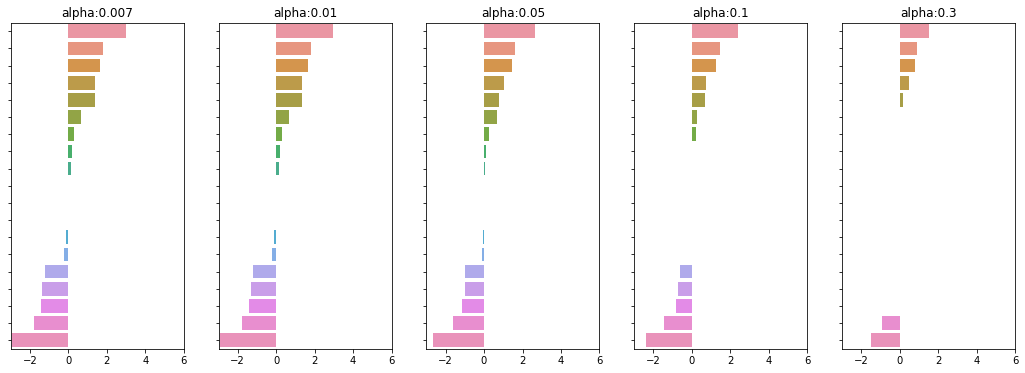

>> cross_val_score <<
--- 최악의 alpha ---
	alpha 0.3 일 때 5 폴드 세트의 개별 Negative MSE scores: [-14.032 -17.167 -14.696 -13.477 -16.623]
	alpha 0.3 일 때 5 폴드 세트의 개별 RMSE scores: [3.746 4.143 3.834 3.671 4.077]
	alpha 0.3 일 때 5 폴드 세트의 평균 RMSE : 3.894

--- 최적의 alpha ---
	alpha 0.007 일 때 5 폴드 세트의 개별 Negative MSE scores: [-13.266 -12.805 -11.594 -10.876 -13.651]
	alpha 0.007 일 때 5 폴드 세트의 개별 RMSE scores: [3.642 3.578 3.405 3.298 3.695]
	alpha 0.007 일 때 5 폴드 세트의 평균 RMSE : 3.524

>> GridSearchCV <<
	GridSearchCV 최적 하이퍼 파라미터 {'alpha': 0.007}
	GridSearchCV 최고 정확도: 0.9468


             params  mean_test_score  rank_test_score
0  {'alpha': 0.007}         0.946849                1
1   {'alpha': 0.01}         0.946840                2
2   {'alpha': 0.05}         0.946010                3
3    {'alpha': 0.1}         0.943977                4
4    {'alpha': 0.3}         0.934463                5 

---------------------------------------------------------------------------------------------------------------

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def graphs_create(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    # 그래프 그리는 함수. Ridge, Lasso, ElasticNet중 입력된 모델과 파라미터로 그래프 출력.
    fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
    coeff_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######')
    for pos, alpha in enumerate(params):
        if model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        elif model_name == 'Lasso':
            model = Lasso(alpha=alpha)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=alpha, l1_ratio=0.7)
        model.fit(X_data_n, y_target_n)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname='alpha:'+str(alpha)
        coeff_df[colname] = coeff
        coeff = coeff.sort_values(ascending=False)
        axs[pos].set_title(colname)
        axs[pos].set_xlim(-3,6)
        sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
        ax = sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
        ax.set(yticklabels=[])

    plt.show()

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True, return_coeff=True):
    # cross_val_score 측정 그래프 함수와 마찬가지로 Ridge, Lasso, ElasticNet중 입력된 모델과 파라미터로 출력.
    coeff_df = pd.DataFrame()
    if verbose :
        print('###### ', model_name, '######\n')
    for i, param in enumerate(params):
        if model_name == 'Ridge':
            model = Ridge(alpha=param)
        elif model_name == 'Lasso':
            model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, scoring="neg_mean_squared_error", cv=5)    
        rmse_scores = np.sqrt(-1*neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)
        
        # 내가 사용할떄 길이가 2인 리스트를 알파 값으로 전달했고
        # 0번 인덱스의 알파가 최악의 성능을 내는 알파, 1번 인덱스의 알파는 최적의 알파를 전달해서 쓰기때문.
        if i == 0:
            print("--- 최악의 alpha ---")
        elif i == len(params)-1:
            print("--- 최적의 alpha ---")
            
        print('\talpha {0} 일 때 5 폴드 세트의 개별 Negative MSE scores: {1}'.format(param, np.round(neg_mse_scores, 3)))
        print('\talpha {0} 일 때 5 폴드 세트의 개별 RMSE scores: {1}'.format(param, np.round(rmse_scores, 3)))
        print('\talpha {0} 일 때 5 폴드 세트의 평균 RMSE : {1:.3f}\n'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
            return coeff_df
        
def graph_create(model_name, param=None, X_data_n=None, y_target_n=None, verbose=True):
    # 알파하나, 모델 하나 전달 받으면 그래프 출력.
    # 최적의 성능을 내는 알파의 그래프 하나만 그릴떄 쓸려고 선언함
    if model_name == 'Ridge':
        model = Ridge(alpha=param)
    elif model_name == 'Lasso':
        model = Lasso(alpha=param)
    elif model_name == 'ElasticNet':
        model = ElasticNet(alpha=param, l1_ratio=0.7)
    
    model.fit(X_data, y_target)
    coeff = pd.Series(data=model.coef_, index=X_data.columns)
    coeff = coeff.sort_values(ascending=False)
    ax = sns.barplot(x=coeff.values, y=coeff.index)
    ax.set(yticklabels=[])
    plt.show()
    
def start_linear_models(X_data_n=None, y_target_n=None, ridge_alphas_n=None, alphas_n=None):
    # 전체 기능을 수행하는 함수.
    # 모델별 GridSearchCV 도 수행한다.
    x_train, x_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state = 121)

    for i in range(0,3):
        if i == 0:
            model_name = 'Ridge'
            use_alphas = ridge_alphas
            model = Ridge()
            graphs_create('Ridge', params=alphas, X_data_n=X_data, y_target_n=y_target)
        elif i == 1:
            model_name = 'Lasso'
            use_alphas = alphas
            model = Lasso()
            graphs_create('Lasso', params=alphas, X_data_n=X_data, y_target_n=y_target)
        elif i == 2:
            model_name = 'ElasticNet'
            use_alphas = alphas
            model = ElasticNet(l1_ratio=0.7)
            graphs_create('ElasticNet', params=alphas, X_data_n=X_data, y_target_n=y_target)
        
        grid_dclf = GridSearchCV(model, param_grid={'alpha':use_alphas}, cv=5, refit=True)
        grid_dclf.fit(x_train, y_train)
        print(">> cross_val_score <<")
        scores_df = pd.DataFrame(grid_dclf.cv_results_)
        worst_param = scores_df[scores_df['rank_test_score']==scores_df.shape[0]]['params'].iloc[0]['alpha']
        get_linear_reg_eval(model_name, params=[worst_param, grid_dclf.best_params_['alpha']], X_data_n=X_data, y_target_n=y_target, verbose=False, return_coeff=False)
        print(">> GridSearchCV <<")
        print("\tGridSearchCV 최적 하이퍼 파라미터",grid_dclf.best_params_)
        print("\tGridSearchCV 최고 정확도: {0:.4f}\n\n".format(grid_dclf.best_score_))

        scores_df = pd.DataFrame(grid_dclf.cv_results_)
        worst_param = scores_df[scores_df['rank_test_score']==scores_df.shape[0]]['params'].iloc[0]['alpha']
        print(scores_df[['params', 'mean_test_score', 'rank_test_score']],'\n')

        print("------------------------------------------------------------------------------------------------------------------")
    #     graph_create(i, grid_dclf.best_params_['alpha'], X_data, y_target)

    
# 데이터 load
file_name = 'StudentsPerformance'
df = pd.read_csv('./data/'+file_name+'.csv')
# 분리, 인코딩
y_target = df['writing score']
df.drop(['writing score'], axis=1, inplace = True)
X_data = pd.get_dummies(df)

# 위에 선언한 함수 사용.
ridge_alphas = [0.07, 0.1, 0.5, 1, 3,]
alphas = [0.007, 0.01, 0.05, 0.1, 0.3,]
start_linear_models(X_data, y_target, ridge_alphas, alphas)